# Data cleaning

## Chosen representatives

In [67]:
import pandas as pd

def split_comittees(comittees: str):
    if comittees == "":
        return []
    return comittees.split("|")

# Chosen representatives
df = pd.read_csv('data/chosen_representatives.csv')
df = df.drop(["office_room", "phone"], axis=1)
df["committee"] = df["committee"].fillna("")
df.to_csv('data/cleaned_chosen_representatives.csv', index=False) 

In [68]:
# All representatives
df = pd.read_csv('data/representatives.csv')
df = df.drop(["office_room", "phone"], axis=1)
df["committee"] = df["committee"].fillna("")
df.to_csv('data/cleaned_representatives.csv', index=False) 

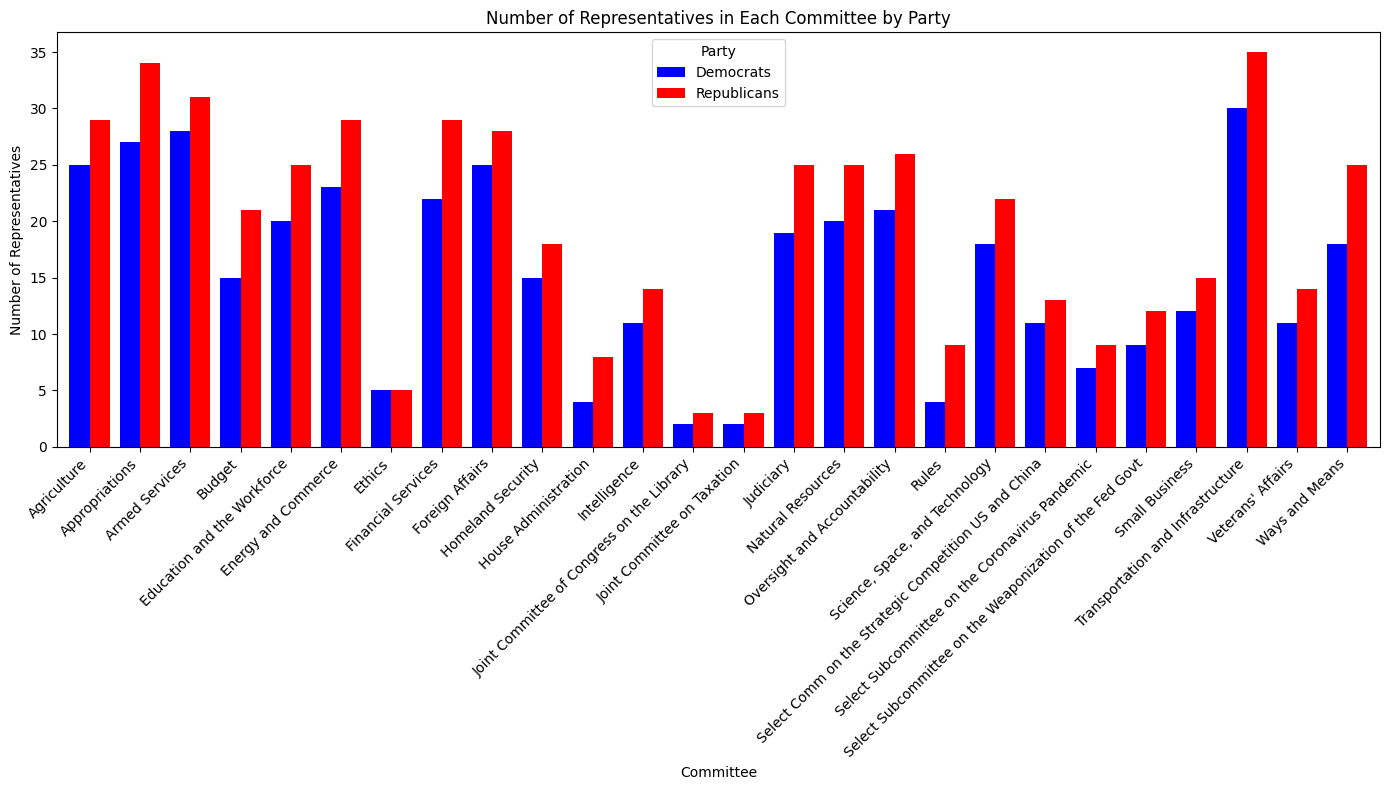

In [69]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt

df["committee"] = df["committee"].transform(split_comittees)

col_list_D = df.loc[df['party'] == 'D']['committee'].values.tolist()
col_list_R = df.loc[df['party'] == 'R']['committee'].values.tolist()
merged_list_D = list(itertools.chain.from_iterable(col_list_D))
merged_list_R = list(itertools.chain.from_iterable(col_list_R))

committee_counts_D = pd.Series(merged_list_D).value_counts()
committee_counts_R = pd.Series(merged_list_R).value_counts()

# Combine counts into a single DataFrame
committee_counts = pd.DataFrame({
    'Democrats': committee_counts_D,
    'Republicans': committee_counts_R
}).fillna(0)  # Fill NaN values with 0

# Plot the bar chart
bar_colors = ['blue', 'red']
committee_counts.plot(kind='bar', figsize=(14, 8), width=0.8, color=bar_colors)
plt.xlabel('Committee')
plt.ylabel('Number of Representatives')
plt.title('Number of Representatives in Each Committee by Party')
plt.legend(title='Party')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
